<a href="https://www.kaggle.com/code/hossamrizk/starter-classification-with-pytorch?scriptVersionId=149257344" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. **Simple EDA**

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/logistic-regression/Social_Network_Ads.csv')
# The first 5 values
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# The last 5 values
df.tail(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [4]:
# Basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
# Statistical informations. Notice it is only work for int data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [6]:
# Is there any missing values ?
print('Is there any missing values?',df.isnull().sum().any())

Is there any missing values? False


In [7]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
# Drop unnecessary columns
df.drop(columns=['User ID'],axis=1,inplace=True)
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
# Shape of data (Rows , columns)
print("The shape of data is ",df.shape)

The shape of data is  (400, 4)


In [10]:
# What is more ? male show or female 
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [11]:
# The majority of age 
df['Age'].value_counts()

Age
35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: count, dtype: int64

**So the majority of ages between 47 and 30**

In [12]:
age_count = df.groupby(['Gender','Age'])['Age'].count().sort_values().reset_index(name='count')
age_count

,Gender,Age,count
0,Male,58,1
1,Female,56,1
2,Male,55,1
3,Male,54,1
4,Male,53,1
...,...,...,...
78,Male,37,10
79,Female,37,10
80,Male,40,11
81,Female,35,13


**Most men and women are in their 30s**

In [13]:
salary_gender = df.groupby(['Gender','EstimatedSalary'])['EstimatedSalary'].count().sort_values().reset_index(name='count')
salary_gender

,Gender,EstimatedSalary,count
0,Female,142000,1
1,Male,47000,1
2,Male,45000,1
3,Male,41000,1
4,Male,38000,1
...,...,...,...
187,Female,80000,6
188,Male,74000,6
189,Male,59000,6
190,Male,79000,7


**We can say that male salary between 7300 and 7900**

**And women salary between 8000 and 7200**

In [14]:
gender_buy = df.groupby(['Gender','Purchased'])['Purchased'].count().sort_values().reset_index(name='count')
gender_buy

,Gender,Purchased,count
0,Male,1,66
1,Female,1,77
2,Female,0,127
3,Male,0,130


**Ok,Women buy more than men**

In [15]:
salary_buy = df.groupby(['EstimatedSalary','Purchased'])['Purchased'].count().sort_values().reset_index(name='count')
salary_buy

,EstimatedSalary,Purchased,count
0,133000,1,1
1,50000,1,1
2,142000,1,1
3,49000,1,1
4,48000,0,1
...,...,...,...
161,71000,0,8
162,75000,0,8
163,79000,0,8
164,80000,0,10


**Most people buy, their salaries range between 7,000 and 8,000**

In [16]:
salary_age = df.groupby(['EstimatedSalary','Age'])['Age'].count().sort_values().reset_index(name='count')
salary_age

,EstimatedSalary,Age,count
0,70000,54,1
1,83000,60,1
2,83000,59,1
3,82000,53,1
4,82000,46,1
...,...,...,...
360,33000,48,2
361,80000,26,2
362,15000,26,2
363,57000,40,3


In [17]:
fig = px.pie(df , 'Gender' , title = 'Gender')
fig.show()

In [18]:
px.histogram(data_frame=df,x='Age',color='Gender',title='Age distribution')

In [19]:
px.histogram(data_frame=df,x='Gender',color='Purchased',title='Gender with purchased distribution')

In [20]:
px.histogram(data_frame=df,color='Gender',x='EstimatedSalary',title='Salay with gender distribution')

In [21]:
px.histogram(data_frame=df,x='Age',color='Purchased',title='Age with Purchased distribution')

# 2. **Preprocessing**

In [22]:
# Conver str values to int 
le = LabelEncoder()
df.Gender=le.fit_transform(df.Gender)

In [23]:
# Select input and output
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [24]:
# Data spliting and standardscaler 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
# Converting train data to torch tensors
X_train = torch.tensor(X_train,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)

# 3. **Model**

In [26]:
input_size = 3

class LogisticRegression(nn.Module):
    def __init__(self,input_size):
        super(LogisticRegression,self).__init__()
        self.linear = nn.Linear(input_size,1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        logits = self.linear(x)
        return self.sigmoid(logits)

In [27]:
model = LogisticRegression(input_size)
criterion = nn.BCELoss()
opimizer = torch.optim.Adam(model.parameters(),lr = 0.01)
epochs = 100
loss_list = []
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train)
    # Calculate loss
    loss = criterion(y_pred.view(-1),y_train)
    loss_list.append(loss.item())
    # Optimization
    opimizer.zero_grad()
    loss.backward()
    opimizer.step()
    # Print the loss
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.8418
Epoch [20/100], Loss: 0.7768
Epoch [30/100], Loss: 0.7222
Epoch [40/100], Loss: 0.6773
Epoch [50/100], Loss: 0.6400
Epoch [60/100], Loss: 0.6090
Epoch [70/100], Loss: 0.5828
Epoch [80/100], Loss: 0.5604
Epoch [90/100], Loss: 0.5411
Epoch [100/100], Loss: 0.5241


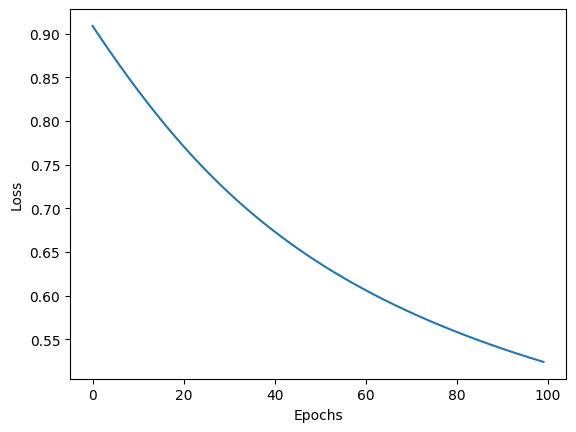

In [28]:
plt.plot(range(epochs), loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [29]:
# Assuming you have x_test as a NumPy array
x_test = torch.from_numpy(X_test).float()  # Convert to a PyTorch float tensor
y_test = torch.from_numpy(y_test).float()  # Convert to a PyTorch float tensor

# Now you can use x_test with your model
with torch.no_grad():
    y_predicted = model(x_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')


accuracy = 60.0800
